In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import missingno as msno
import folium
import plotly.express as px
import plotly.graph_objects as go
import sort_dataframeby_monthorweek as sd

from folium.plugins import HeatMap
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Đọc dữ liệu 
df = pd.read_csv("hotel.csv")

# Tiến hành trực quan hóa bộ dữ liệu trước khi biến đổi dữ liệu và xóa thuộc tính

#### Thống kê tỷ lệ nhận phòng và hủy phòng

In [16]:
df['IsCanceled'].value_counts()

IsCanceled
0    75166
1    44224
Name: count, dtype: int64

<Axes: xlabel='IsCanceled'>

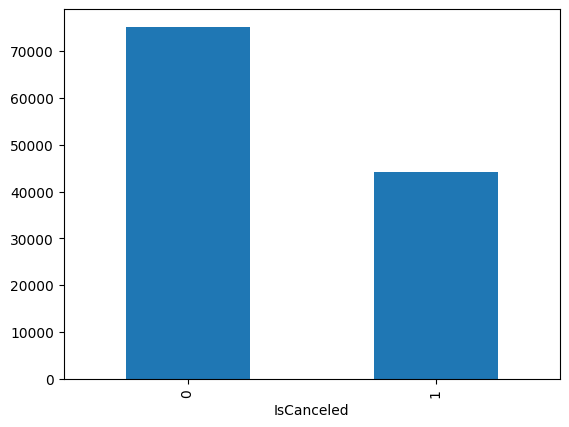

In [17]:
df['IsCanceled'].value_counts().plot(kind = 'bar')

#### Thống kê loại hình khách sạn nào thu hút nhiều khách hàng nhất

Text(0.5, 1.0, 'Biểu đồ khách hàng của từng khách sạn')

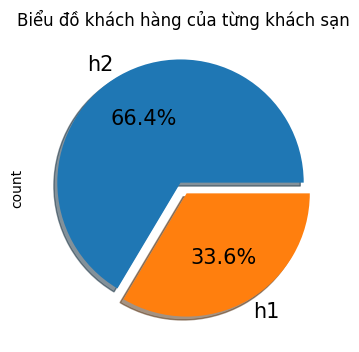

In [18]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',shadow=True,  figsize=(6,4),fontsize=15)   
plt.title('Biểu đồ khách hàng của từng khách sạn')

#### Thống kê doanh thu mỗi tháng trong tập dữ liệu 

In [19]:
# Tạo biến để lưu trữ các giá trị trong tập dữ liệu theo từng loại hình khách sạn và nhận phòng thành công.
data_h1 = df[(df['hotel'] == 'h1') & (df['IsCanceled'] == 0)]
data_h2 = df[(df['hotel'] == 'h2') & (df['IsCanceled'] == 0)]

In [20]:
# Giá trị trung bình theo từng tháng của khách sạn resort
resort_hotel = data_h1.groupby(['ArrivalDateMonth'])['ADR'].mean().reset_index()
resort_hotel

,ArrivalDateMonth,ADR
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [21]:
# Giá trị trung bình theo từng tháng của khách sạn city
city_hotel=data_h2.groupby(['ArrivalDateMonth'])['ADR'].mean().reset_index()
city_hotel

,ArrivalDateMonth,ADR
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [22]:
final_hotel = city_hotel
final_hotel["Price_Resort"]= resort_hotel["ADR"]
final_hotel.rename(index=str,columns={'ADR':'Price_City'},inplace=True)
final_hotel

,ArrivalDateMonth,Price_City,Price_Resort
0,April,111.856824,75.867816
1,August,118.412083,181.205892
2,December,87.856764,68.322236
3,February,86.183025,54.147478
4,January,82.160634,48.708919
5,July,115.563810,150.122528
6,June,117.702075,107.921869
7,March,90.170722,57.012487
8,May,120.445842,76.657558
9,November,86.500456,48.681640


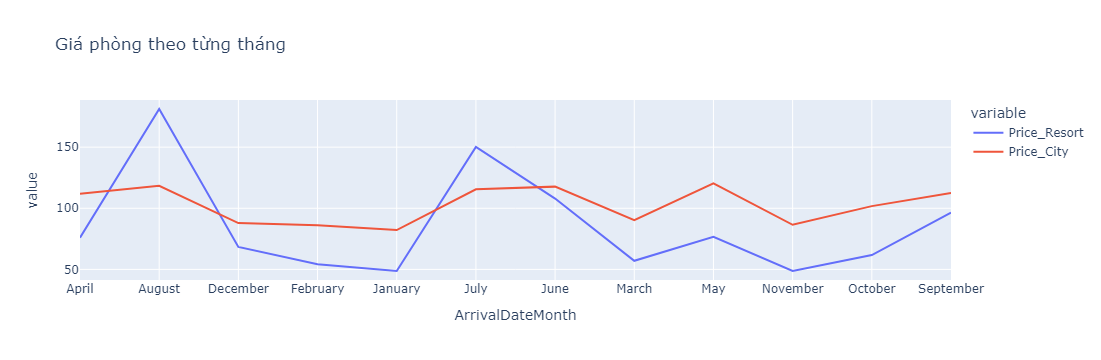

<Figure size 2500x1200 with 0 Axes>

In [25]:
plt.figure(figsize = (25, 12))
px.line(final_hotel, x = 'ArrivalDateMonth', y = ['Price_Resort','Price_City'],
        title = 'Giá phòng theo từng tháng')

#### Thống kê tỷ lệ hủy đặt phòng với từng loại hình đặt cọc 

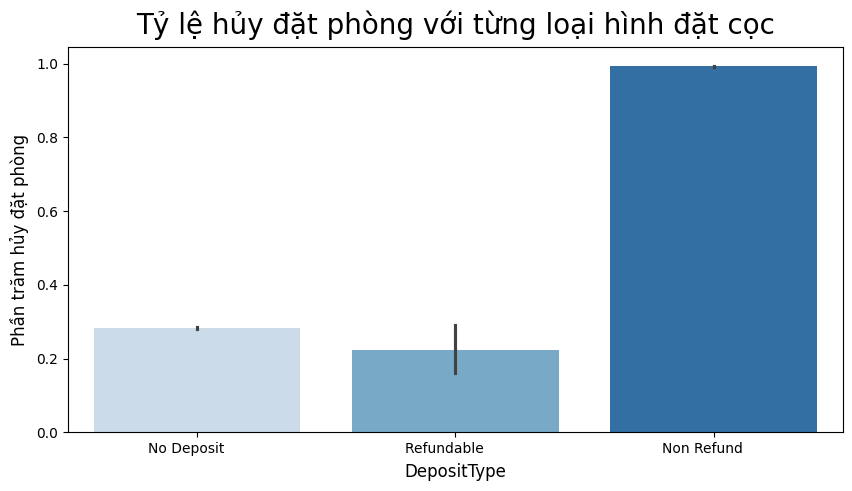

In [27]:
plt.figure(figsize=(10,5)) 
plt.title("Tỷ lệ hủy đặt phòng với từng loại hình đặt cọc", fontsize = 20, pad = 10)
sns.barplot(x=df['DepositType'], y=df['IsCanceled'], palette='Blues')
plt.xlabel("DepositType", fontsize = 12, labelpad = 5)
plt.ylabel("Phần trăm hủy đặt phòng", fontsize = 12, labelpad = 5);

#### Thống kê tỷ lệ phần trăm của các giá trị trong thuộc tính phân khúc thị trường với trạng thái hủy đặt phòng và nhận phòng.

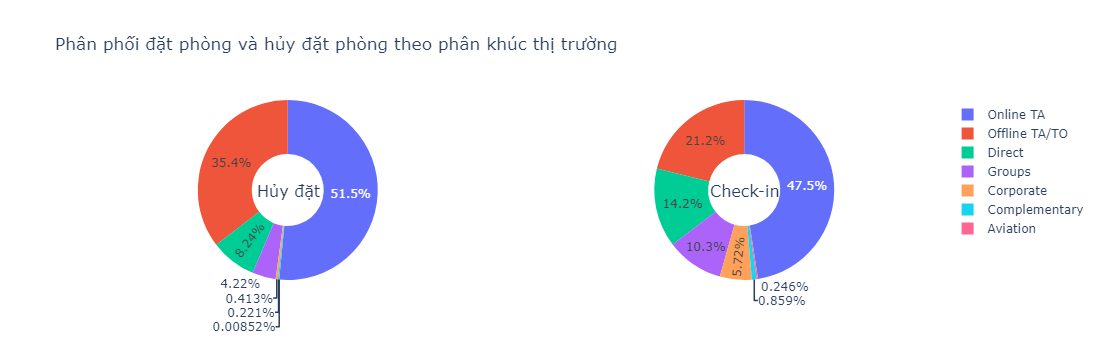

In [37]:
# Khai báo dữ liệu
labels = ["Aviation", "Complementary", "Corporate", "Groups", "Direct", "Offline TA/TO", "Online TA"]

canceled = df[df['IsCanceled']==1][['MarketSegment']]
canceled = canceled.MarketSegment.value_counts().sort_values()

not_canceled = df[df['IsCanceled']==0][['MarketSegment']]
not_canceled = not_canceled.MarketSegment.value_counts().sort_values()

# Vẽ biểu đồ
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=canceled, name="Canceled"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=not_canceled, name="Check-in"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# Cập nhật layout và thêm ghi chú
fig.update_layout(
    title_text="Phân phối đặt phòng và hủy đặt phòng theo phân khúc thị trường",
    annotations=[dict(text='Hủy đặt', x=0.185, y=0.5, font_size=16, showarrow=False),
                 dict(text='Check-in', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

#### Tỷ lệ các trạng thái đăng ký khi hủy bỏ phòng thành công

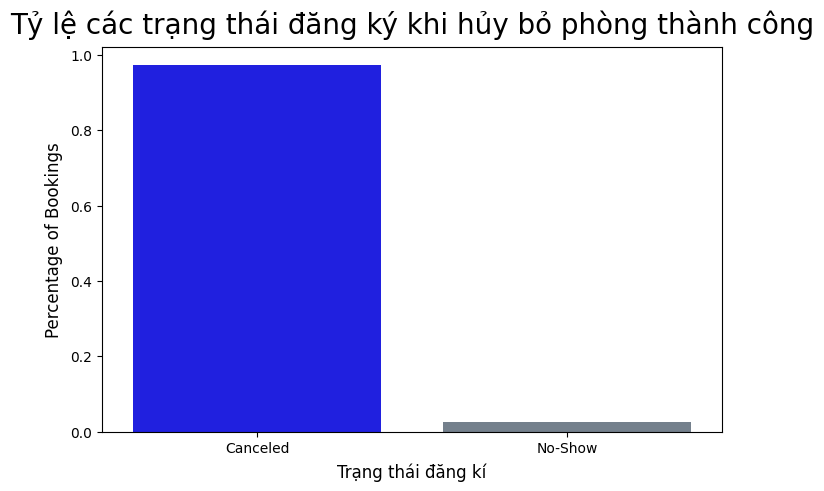

In [38]:
plt.figure(figsize=(8,5)) 
plt.title("Tỷ lệ các trạng thái đăng ký khi hủy bỏ phòng thành công", fontsize = 20, pad = 10)
sns.barplot(x=df[df['IsCanceled']==1]['ReservationStatus'].unique(), 
            y=df[df['IsCanceled']==1]['ReservationStatus'].value_counts(normalize=True), 
            palette=['blue', 'slategrey'])
plt.xlabel("Trạng thái đăng kí", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

#### Thống kê tỷ lệ phòng bị hủy

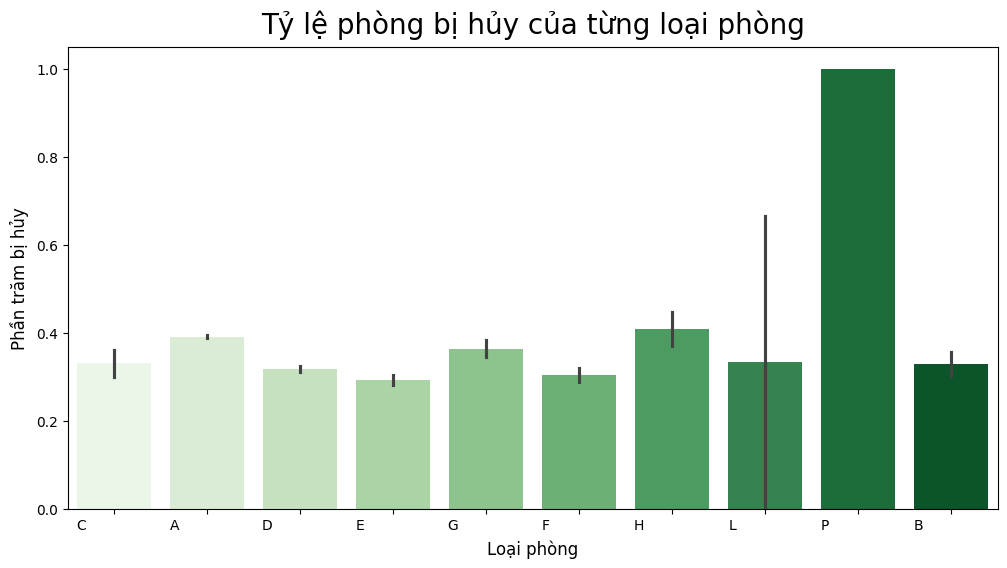

In [42]:
plt.figure(figsize=(12,6)) 
plt.title("Tỷ lệ phòng bị hủy của từng loại phòng", fontsize = 20, pad = 10)
sns.barplot(x=df['ReservedRoomType'], y=df['IsCanceled'], palette='Greens')
plt.xlabel("Loại phòng", fontsize = 12, labelpad = 5)
plt.ylabel("Phần trăm bị hủy", fontsize = 12, labelpad = 5);

#### Kênh phân phối nào có tỷ lệ hủy cao nhất

Text(0.5, 1.0, 'Tỷ lệ hủy đặt phòng theo kênh phân phối')

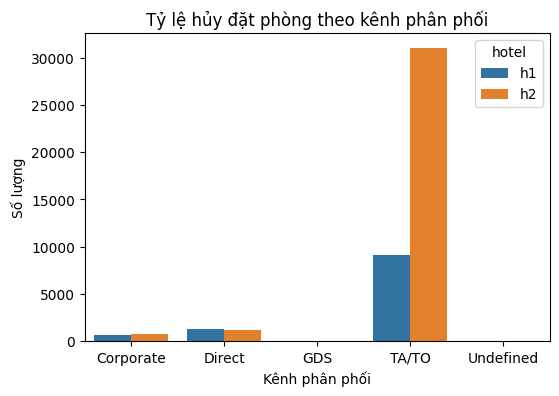

In [43]:
canceled_df = df[df['IsCanceled']==1]

# Nhóm theo kênh phân phối
canceled_df = canceled_df.groupby(['DistributionChannel', 'hotel']).size().reset_index().rename(columns={0:'Số lượng'})
canceled_df

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
sns.barplot(x='DistributionChannel', y='Số lượng', hue="hotel", data=canceled_df)
plt.xlabel('Kênh phân phối')
plt.ylabel('Số lượng')
plt.title('Tỷ lệ hủy đặt phòng theo kênh phân phối')

#### Thể hiện hệ số tương quan giữa giá trị hủy đặt phòng và các thuộc tính còn lại

(18.0, 1.0)

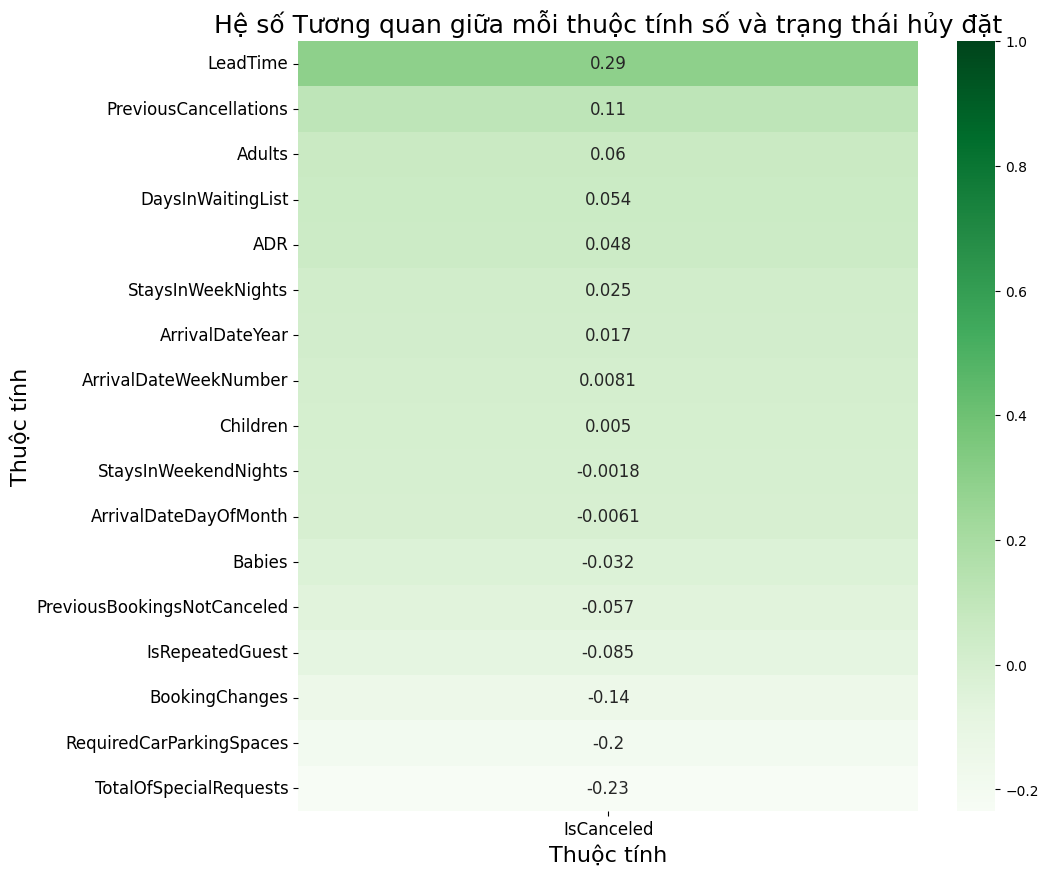

In [51]:
numeric_df = df.select_dtypes(include=['number']) 
corr_df = numeric_df.corr()  # Tính toán ma trận tương quan

fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr_df[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot=True, annot_kws={"size": 12}, cmap='Greens')

ax.set_title('Hệ số Tương quan giữa mỗi thuộc tính số và trạng thái hủy đặt', fontsize=18)
ax.set_xlabel('Thuộc tính', fontsize=16)
ax.set_ylabel('Thuộc tính', fontsize=16)
ax.tick_params(axis="both", labelsize=12)
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max + 1)